# 31. TETRA: CLUSTER MODEL TRAINING
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

tetra = pd.read_csv('data/tetra_df')
print(tetra.shape)
tetra.head()

(400, 4)


,col1,col2,col3,labels
0,1.295,0.051,-0.385,1
1,1.409,-0.035,-0.252,1
2,1.097,0.246,-0.415,1
3,1.463,0.265,-0.513,1
4,1.603,0.081,-0.470,1


In [2]:
tetra['labels'].value_counts()

4    100
3    100
2    100
1    100
Name: labels, dtype: int64

In [4]:
X_train = tetra.drop('labels', axis=1)
X_train.shape

(400, 3)

## 2. The Elbow Method for Finding Optimal N-Clusters

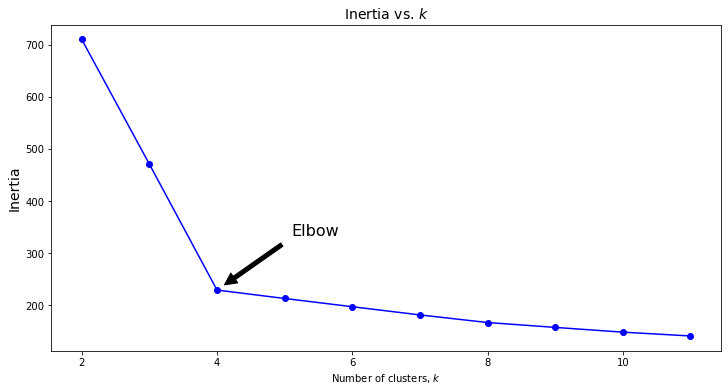

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(2, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.40, 0.40),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 3. The Silhouette Score Method for Finding Optimal N_Clusters

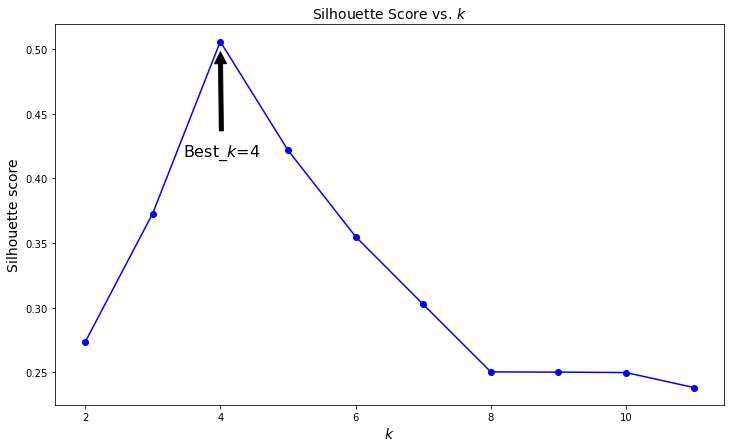

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) 
                     for model in kmeans_per_k]

plt.figure(figsize=(12, 7))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.title('Silhouette Score vs. $k$', fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Best_$k$=4',
             xy=(4, silhouette_scores[2]),
             xytext=(0.25, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 4. Silhouette Analysis for KMeans Clustering
Analyzing the best 4 k clusters: 3, 4, 5, and 6

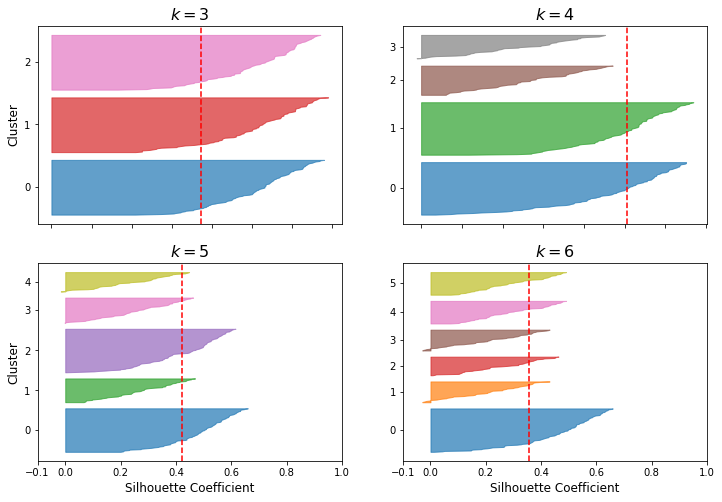

In [21]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(12, 8))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster", fontsize=12)
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## 5. KMeans Clustering at k=4

In [29]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [30]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3]), array([100, 100, 100, 100], dtype=int64))

## 6. Evaluating KMeans Performance
#### i. Adjusted Rand Index
The Adjusted Rand Index is a function that measures the similarity of two assignments

In [32]:
from sklearn import metrics

y_true = tetra['labels']
metrics.adjusted_rand_score(y_true, y_pred)

1.0

In [33]:
metrics.adjusted_rand_score(y_pred, y_true)

1.0

#### ii. Mutual Information based scores

In [34]:
metrics.adjusted_mutual_info_score(y_true, y_pred)

1.0

In [35]:
metrics.normalized_mutual_info_score(y_true, y_pred)  

1.0

In [36]:
metrics.mutual_info_score(y_true, y_pred)

1.38629436111989

#### iii. Homogeneity, completeness and V-measure
- `homogeneity`: each cluster contains only members of a single class
- `completeness`: all members of a given class are assigned to the same cluster
- `V-measure`: their harmonic mean

These metrics are equivalent to precision, recall, and F1 score for classification

In [37]:
metrics.homogeneity_score(y_true, y_pred)

1.0

In [38]:
metrics.completeness_score(y_true, y_pred)

1.0

In [39]:
metrics.v_measure_score(y_true, y_pred)

1.0

In [40]:
# all at once
metrics.homogeneity_completeness_v_measure(y_true, y_pred)

(1.0, 1.0, 1.0)

## 7. Visualizing Predicted Clusters in 3D

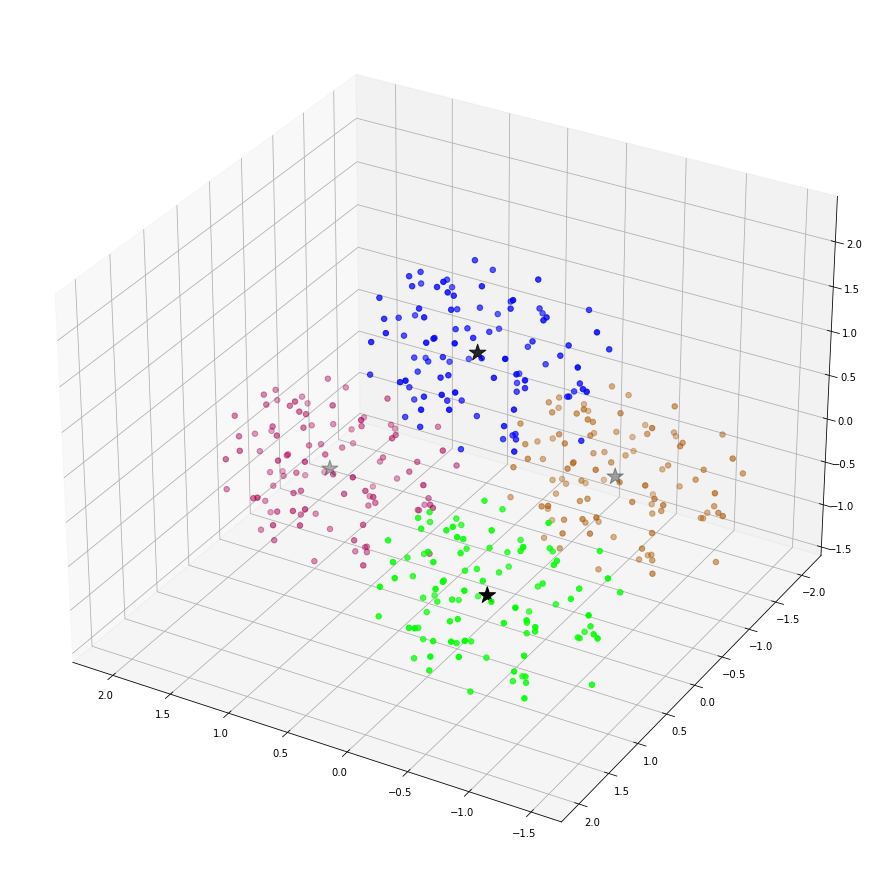

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tetra['col1'], tetra['col2'], tetra['col3'], 
           c=y_pred, cmap=plt.cm.brg, s=30)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 300, c = 'k', marker='*')   
ax.view_init(30, 120)
plt.show()